In [1]:
import networkx as nx
from get_graph_and_attributes import *
from graphviz import Graph

[[0 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


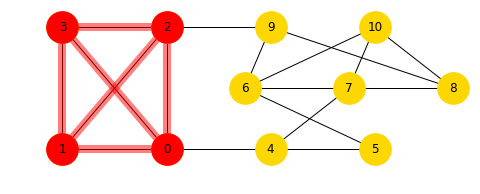

In [2]:
G, data, name = from_new_synthesized_data()
# nodes
total_nodes = list(G.nodes())
sg_nodes = [0,1,2,3]
rest_nodes = [x for x in total_nodes if x not in sg_nodes]

# pos = nx.random_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
pos = {0: (40, 20), 1: (20, 20), 2: (40, 40), 3: (20, 40), 4:(60,20), \
        5: (80,20), 6: (55, 30), 7: (75,30), 8: (95,30), 9: (60,40), 10:(80,40)}

plt.figure(1,figsize=(8,3))

nx.draw_networkx(G, pos, \
        with_labels=True,
        node_size=1000,
        width=1,
        node_color='gold')

nx.draw_networkx_nodes(G, pos, \
                    nodelist=sg_nodes,
                    node_size=1000,
                    node_color='red')


# edges

H = G.subgraph(sg_nodes)
sg_edges = list(H.edges())
nx.draw_networkx_edges(G, pos,\
                    edgelist=sg_edges,
                    width=8., alpha=.5,
                    edge_color='red')

plt.axis('off')
plt.savefig('egNW.pdf')
plt.show()



In [3]:
## New synthesized_data()
def new_synthesized_network():
    indptr=np.array([0,3,5,6,7,9,10,11,12,12])
    indices=np.array([1,2,3,2,3,3,7,5,6,6,8,8])
    data=np.ones(12)

    A = csr_matrix((data, indices, indptr), dtype=np.int8,shape=(9,9))
    print(A.todense())

    G = nx.from_scipy_sparse_matrix(A)

    return G

[[0 1 1 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


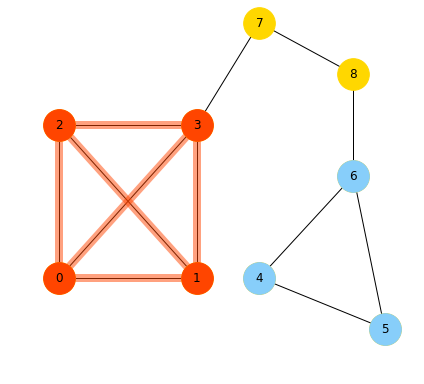

In [4]:
## New version
G = new_synthesized_network()
# nodes
total_nodes = list(G.nodes())
sg1_nodes = [0,1,2,3]
sg2_nodes = [7,8]
sg3_nodes = [4,5,6]

# pos = nx.random_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
pos = {0: (18, 25), 1: (40, 25), 2: (18, 40), 3: (40, 40), 4:(50,25), \
        5: (70,20), 6: (65, 35), 7: (50,50), 8: (65,45)}

plt.figure(1,figsize=(7,6.5))

nx.draw_networkx(G, pos, \
        with_labels=True,
        node_size=1000,
        width=1,
        node_color='gold')

nx.draw_networkx_nodes(G, pos, \
                    nodelist=sg1_nodes,
                    node_size=1000,
                    node_color='orangered')

nx.draw_networkx_nodes(G, pos, \
                    nodelist=sg3_nodes,
                    node_size=1000,
                    node_color='lightskyblue')



# edges

H = G.subgraph(sg1_nodes)
sg_edges = list(H.edges())
nx.draw_networkx_edges(G, pos,\
                    edgelist=sg_edges,
                    width=8., alpha=.5,
                    edge_color='orangered')

plt.axis('off')
plt.savefig('new_synnet.pdf')
plt.show()

In [8]:
# Plot summarization for synthesized graph
def visualize_by_collapsedNodes():

    # compute the connectivity density between each pair of blocks
    density_M = [[1,0,0.125],[0,1,0.167],[0.125,0.167,1]]
    current_blocks = [[0,1,2,3],[4,5,6],[7,8]]
    weight_M = [[6,0,1],[0,3,1],[1,1,1]]
    # a circular layout visualization
    g = Graph('G','collapsedNetwork_new_synnet.gv')
    n = len(current_blocks)

    widths = [len(current_blocks[i]) for i in range(n)]
    colors = ['orangered', 'lightskyblue','gold']
    g.attr(layout='neato')
#     g.attr(nodesep='2.', mindist='4.5')
    poses = ['0,0!','3,0!','1.5,2!']

    for i in range(n):
        g.attr('node', shape='circle', fixedsize='true', fontsize='20',fontcolor='{h:} 0.8 0.8'.format(h=i/n),style='filled',\
               fillcolor=colors[i],pos=poses[i])
#              fillcolor='{h:} 0.6 0.8'.format(h=i/n),width=str(widths[i]))
#                 pos='1,str(sum(widths[:i+1])+1.*i)')
#         g.node('cluster %d'% i)
        g.node(str(i+1), label='')

    for i in range(n):
        for j in range(i,n):
#             g.attr('edge', penwidth = str(10*density_M[i][j]), color='#7d7d7d50', arrowsize = str(1), arrowhead='normal',fontsize='20')
#             g.edge('cluster %d'% i, 'cluster %d'% j)
#             g.edge(str(i+1), str(j+1),label='  '+str(weight_M[i][j]).replace('0','')+'   ')
            g.attr('edge',color='#7d7d7d50',penwidth='3',arrowsize = str(1), arrowhead='normal',fontsize='20')
            str(i+1):e -> str(j+1):n[label='  '+str(weight_M[i][j])+'   ']
#             g.edge(str(i+1), str(j+1),label='  '+str(weight_M[i][j])+'   ')

    g.view()
visualize_by_collapsedNodes()



SyntaxError: invalid syntax (<ipython-input-8-9c7e4b67621a>, line 32)

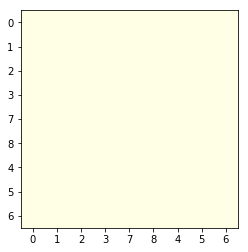

In [69]:
# plot heatmap for new synnet
def visualize_by_heatmap():

    # compute the connectivity density between each pair of blocks
    density_M = np.zeros((9,9))
    n = 9
    fig, ax = plt.subplots()
    im = ax.imshow(density_M, cmap = "YlGn")

    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels([0,1,2,3,7,8,4,5,6])
    ax.set_yticklabels([0,1,2,3,7,8,4,5,6])


    # plt.setp(ax.get_xticklabels(), rotation=15, ha="right",rotation_mode="anchor")
#     for i in range(n):
#         for j in range(n):
#             text = ax.text(j,i,round(density_M[i,j],5),ha="center", va="center")

    plt.show()
    fig.savefig('forfig2.pdf')
visualize_by_heatmap()